# Summary

In [2]:
# What we are doing in this question:-  
#  -> loading of iris data (all features).
#  -> spliting 80% of this data for training & remaining 20% data for testing.
#  -> Now, we creates a classifier, then we train & fit this classifier object, and finally, we predict our testing data.
#  -> Calculating accuracy, precision, recall, and f1 score & ploting this versus no. of neighbours.
#  -> To get a clear insight, we are plotting the performance measures with neighbors individually & together also.
  
# Note:- We are doing this process:- 
#        1) for k values 1 to 50. Hence, no. of neighbours in X-axis of plot is from 1 to 50
#        2) for both uniform & distance weighted classifier.
#        3) for both micro & macro averaged precision, recall and f1 score.
#        4) calculating & plotting accuracy, precision, recall and f1 score
#           for both overall data(all classes included) and for each classes(class 1, class 2, class 3) individually.
           

In [3]:
# What we observed & concluded after completing this second question of the assignment:- 
#   -> For micro-averaged, precision, recall and f1 score are same, & therefore graph is also similar.
#   -> For macro-averaged, precision, recall and f1 are different, but, with a very small margin as we can see in the plots.
#   -> We can also calculate precision, recall and f1 for each classes(class 1, class 2, class 3) using confusion matrix.
   
#   -> Best classifier is that classifier which shows best accuracy or least error rate at any particular value of "k".
#   -> Worst classifier is that classifier which shows least accuracy or high error rate at any particular value of "k".
  

# Question 1 :-  Plot accuracy, precision, recall, and f1-score ("For all class together")  vs. the number of neighbors with a 20% test split on the iris data using all 4 features 

In [4]:
# Importing all the libraries.
from collections import Counter
import math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()



# Creating the function split data.
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results


# Creating the function train_test_split.
def train_test_split(x, y, test_pct):
    data = list(zip(x, y))                        # pair corresponding values
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = list(zip(*train))          # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test



# Finding Accuracy, precision, recall, F1 for "Uniform" one (k= 1to 50)

In [5]:
# import the iris dataset
iris = datasets.load_iris()


#Create train_test_result
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)


# Creating a list to store accuracy, micro & macro averaged precision, recall & f1 score for all 'K' values.
accuracy=[]

precision_micro=[]
recall_micro=[]
f1_score_micro=[]

precision_macro=[]
recall_macro=[]
f1_score_macro=[]


# Creating a loop to get all accuracy, micro & macro averaged precision, recall & f1 score from k=1 to 50. 
for K in range(50):
    
    # Increasing the value of 'k' because neighbour should startn from 1 instead of 0.
    K_value = K+1
    
    # Create classifier object
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform')

    # Train the classifier(fit the estimator using the training data)
    knn.fit(X_train, y_train)

    # Predict the test data
    class_predict=knn.predict(X_test)

    # Inserting a code to store Accuracy for all neighboure from 1 to 50
    accuracy.append(metrics.accuracy_score(y_test, class_predict)*100)
    
    # Inserting a code to store Micro averaged precision, recall, f1 score for all neighboure from 1 to 50
    precision_micro.append(metrics.precision_score(y_test, class_predict, average='micro')*100)
    recall_micro.append(metrics.recall_score(y_test, class_predict, average='micro')*100)
    f1_score_micro.append(metrics.f1_score(y_test, class_predict, average='micro')*100)

    # Inserting a code to store Macro averaged precision, recall, f1 score for all neighboure from 1 to 50
    precision_macro.append(metrics.precision_score(y_test, class_predict, average='macro')*100)
    recall_macro.append(metrics.recall_score(y_test, class_predict, average='macro')*100)
    f1_score_macro.append(metrics.f1_score(y_test, class_predict, average='macro')*100)


# Rounding off the accuracy up to 2 decimal point 

Accuracy = [ '%.2f' % elem for elem in accuracy]
print('\n\nAccuracy of all the classes from k = 1 to 50 are :-\n\n',Accuracy)



# Rounding off the Micro averaged precision, recall, f1 score up to 2 decimal point

Precision_micro = [ '%.2f' % elem for elem in precision_micro]
print('\n\nMicro Averaged Precision of all the classes from k = 1 to 50 are :-\n\n',Precision_micro)

Recall_micro = [ '%.2f' % elem for elem in recall_micro]
print('\n\nMicro Averaged Recall of all the classes from k = 1 to 50 are :-\n\n',Recall_micro)

F1_score_micro = [ '%.2f' % elem for elem in f1_score_micro]
print('\n\nMicro Averaged F1 score of all the classes from k = 1 to 50 are :-\n\n',F1_score_micro)



# Rounding off the Macro averaged precision, recall, f1 score up to 2 decimal point

Precision_macro = [ '%.2f' % elem for elem in precision_macro]
print('\n\nMacro Averaged Precision of all the classes from k = 1 to 50 are :-\n\n',Precision_macro)

Recall_macro = [ '%.2f' % elem for elem in recall_macro]
print('\n\nMacro Averaged Recall of all the classes from k = 1 to 50 are :-\n\n',Recall_macro)

F1_score_macro = [ '%.2f' % elem for elem in f1_score_macro]
print('\n\nMacro Averaged F1 score of all the classes from k = 1 to 50 are :-\n\n',F1_score_macro)



Accuracy of all the classes from k = 1 to 50 are :-

 ['97.56', '95.12', '97.56', '97.56', '97.56', '97.56', '97.56', '95.12', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '97.56', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12']


Micro Averaged Precision of all the classes from k = 1 to 50 are :-

 ['97.56', '95.12', '97.56', '97.56', '97.56', '97.56', '97.56', '95.12', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '97.56', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '97.56', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12', '95.12

# Individual plots b/w accuracy, precision, recall, f1, and no. of neighbors || Uniform model

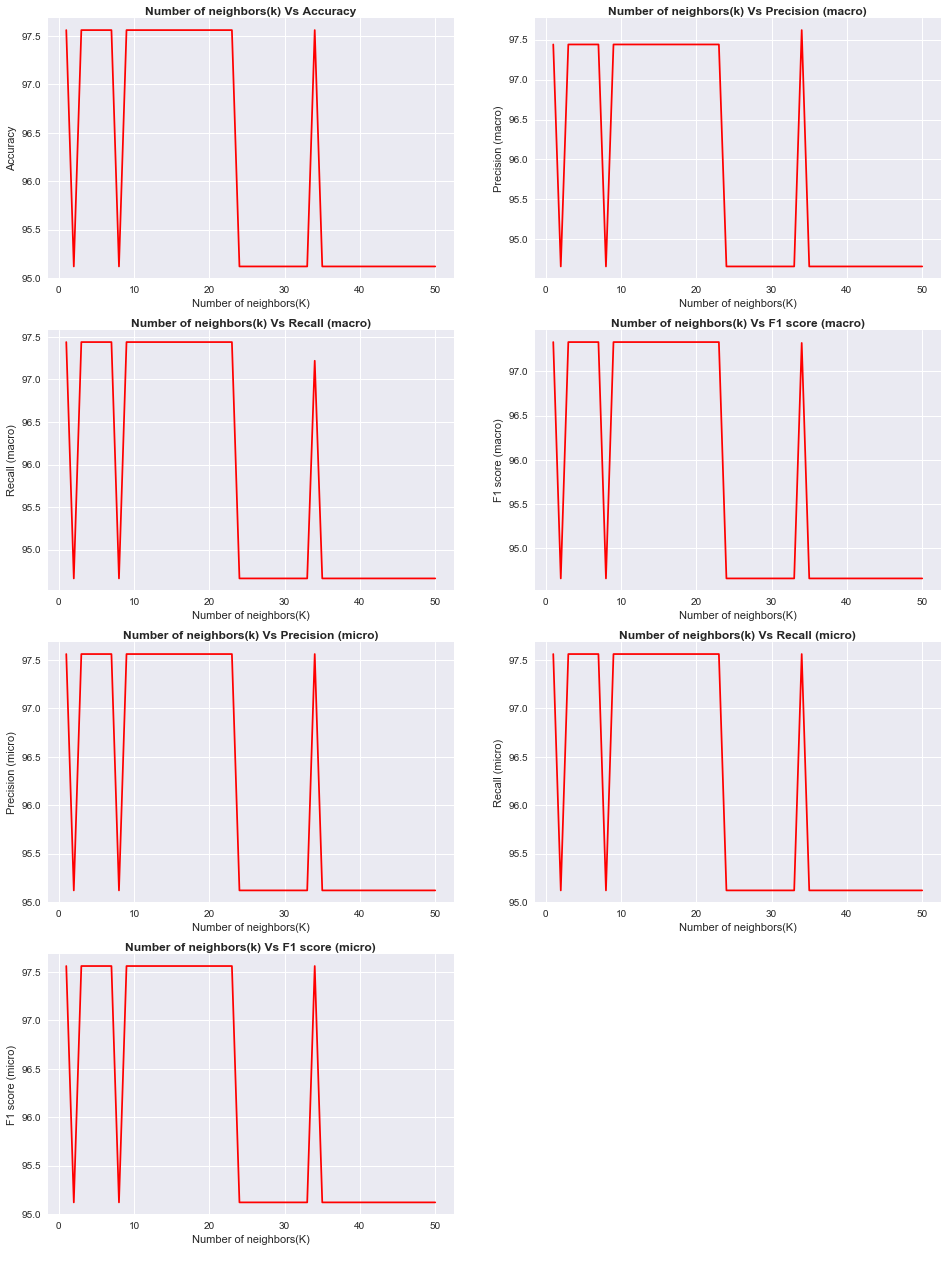

In [6]:
# Inserting a code to create X-axis, K_neighbours.
K_neighbours=list(range(1,51,1))

# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_macro, Recall_macro, F1_score_macro, Precision_micro, Recall_micro, F1_score_micro]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (macro)", "Recall (macro)", "F1 score (macro)", 
    "Precision (micro)", "Recall (micro)", "F1 score (micro)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)


plt.show()




# NOTE:-
# As, we can see in the below plots, micro averaged precision, recall & f1 are showing similar plots . 
# However, if we see on macro averaged precision, recall, f1, there is slight difference in all of 
# these plots at many points.

# Plot b/w accuracy, macro averaged precision, recall, F1 vs no. of neighbours || Uniform classifier

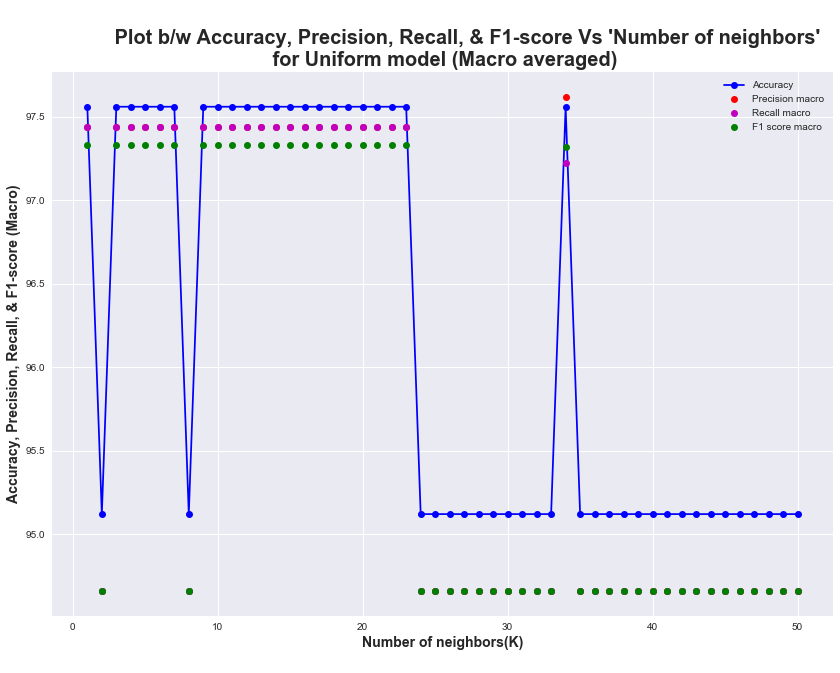

In [7]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', ls='-',  label='Accuracy')
plt.plot(K_neighbours, Precision_macro,'ro', label='Precision macro')
plt.plot(K_neighbours, Recall_macro, 'mo', label='Recall macro')
plt.plot(K_neighbours, F1_score_macro, 'go', label='F1 score macro')


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Macro)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Uniform model (Macro averaged)", fontsize=20,fontweight='bold')
plt.legend(loc='best')
plt.show()



# NOTE:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot b/w accuracy, micro averaged precision, recall, F1 vs no. of neighbours || Uniform classifier

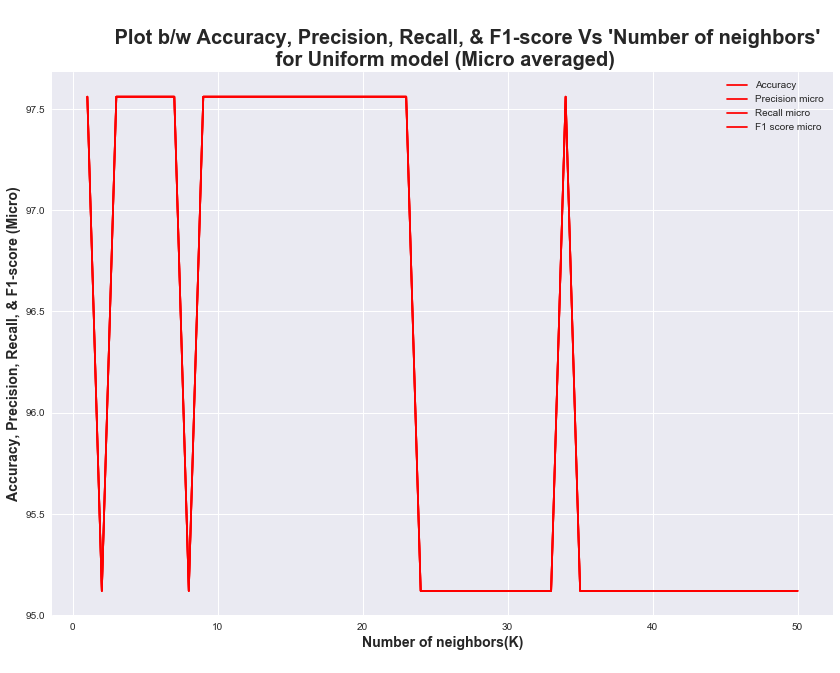

In [8]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))

# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, color="red", label='Accuracy')
plt.plot(K_neighbours, Precision_micro, color="red", label='Precision micro')
plt.plot(K_neighbours, Recall_micro, color="red",  label='Recall micro')
plt.plot(K_neighbours, F1_score_micro, color="red", label='F1 score micro')# linestyle = 'solid'

# Inserting a code to make a plot.
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Micro)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')

# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Uniform model (Micro averaged)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# NOTE:-
# We can clearly see in the below graph, precision, recall & f1 are same in case of micro averaged.


# Best & Worst Classifier in Uniform model





In [9]:
# Inserting code to create a list to store neighbor values at best & worst accuracy
Best_uniform, Worst_uniform = [],[] 

#Inserting a code to get all the neighbour values for the best & worst accuracy
for i in range(0,len(Accuracy)):
    if Accuracy[i]==max(Accuracy):
        Best_uniform.append(i+1)
    if Accuracy[i]==min(Accuracy):
        Worst_uniform.append(i+1)
        
Best_uniform_value=max(Accuracy)
Worst_uniform_value=min(Accuracy)
        
print("\nBest classifier for uniform model is showing "+ Best_uniform_value +" at K="+str(Best_uniform))
print("\nWorst classifier for uniform model is showing "+ Worst_uniform_value +" at K="+str(Worst_uniform)+"\n")


Best classifier for uniform model is showing 97.56 at K=[1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 34]

Worst classifier for uniform model is showing 95.12 at K=[2, 8, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]



# Finding Accuracy, precision, recall, F1 for "Distance" one (k= 1to 50)

In [16]:

#Create train_test_result
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)


# Creating a list to store accuracy, micro & macro averaged precision, recall & f1 score for all 'K' values.
accuracy=[]

precision_micro=[]
recall_micro=[]
f1_score_micro=[]

precision_macro=[]
recall_macro=[]
f1_score_macro=[]


# Creating a loop to get all accuracy, micro & macro averaged precision, recall & f1 score from k=1 to 50.
for K in range(50):
    
    # Increasing the value of 'k' because neighbour should start from 1 instead of 0.
    K_value = K+1
    

    #Create classifier object
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='distance')

    #train the classifier(fit the estimator using the training data)
    knn.fit(X_train, y_train)

    #Predict the test data
    class_predict=knn.predict(X_test)
    
    # Inserting a code to store Accuracy for all neighboure from 1 to 50
    accuracy.append(metrics.accuracy_score(y_test, class_predict)*100)
    
    # Inserting a code to store Micro averaged precision, recall, f1 score for all neighboure from 1 to 50
    precision_micro.append(metrics.precision_score(y_test, class_predict, average='micro')*100)
    recall_micro.append(metrics.recall_score(y_test, class_predict, average='micro')*100)
    f1_score_micro.append(metrics.f1_score(y_test, class_predict, average='micro')*100)

    # Inserting a code to store Macro averaged precision, recall, f1 score for all neighboure from 1 to 50
    precision_macro.append(metrics.precision_score(y_test, class_predict, average='macro')*100)
    recall_macro.append(metrics.recall_score(y_test, class_predict, average='macro')*100)
    f1_score_macro.append(metrics.f1_score(y_test, class_predict, average='macro')*100)

    
# Rounding off the accuracy up to 2 decimal point 
Accuracy = [ '%.2f' % elem for elem in accuracy]
print('\n\nAccuracy of all the classes from k = 1 to 50 are :-\n\n',Accuracy)


# Rounding off the Micro averaged precision, recall, f1 score up to 2 decimal point
Precision_micro = [ '%.2f' % elem for elem in precision_micro]
print('\n\nMicro Averaged Precision of all the classes from k = 1 to 50 are :-\n\n',Precision_micro)

Recall_micro = [ '%.2f' % elem for elem in recall_micro]
print('\n\nMicro Averaged Recall of all the classes from k = 1 to 50 are :-\n\n',Recall_micro)

F1_score_micro = [ '%.2f' % elem for elem in f1_score_micro]
print('\n\nMicro Averaged F1 score of all the classes from k = 1 to 50 are :-\n\n',F1_score_micro)


# Rounding off the Macro averaged precision, recall, f1 score up to 2 decimal point

Precision_macro = [ '%.2f' % elem for elem in precision_macro]
print('\n\nMacro Averaged Precision of all the classes from k = 1 to 50 are :-\n\n',Precision_macro)

Recall_macro = [ '%.2f' % elem for elem in recall_macro]
print('\n\nMacro Averaged Recall of all the classes from k = 1 to 50 are :-\n\n',Recall_macro)

F1_score_macro = [ '%.2f' % elem for elem in f1_score_macro]
print('\n\nMacro Averaged F1 score of all the classes from k = 1 to 50 are :-\n\n',F1_score_macro)





Accuracy of all the classes from k = 1 to 50 are :-

 ['92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '88.00', '88.00', '88.00', '92.00', '88.00', '92.00', '88.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '88.00', '88.00', '88.00', '88.00', '88.00', '88.00', '88.00', '88.00']


Micro Averaged Precision of all the classes from k = 1 to 50 are :-

 ['92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '88.00', '88.00', '88.00', '92.00', '88.00', '92.00', '88.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '92.00', '88.00', '92.00', '88.00', '88.00', '88.00', '88.00', '88.00

# Individual plots b/w accuracy, precision, recall, f1, and no. of neighbors || Distance model

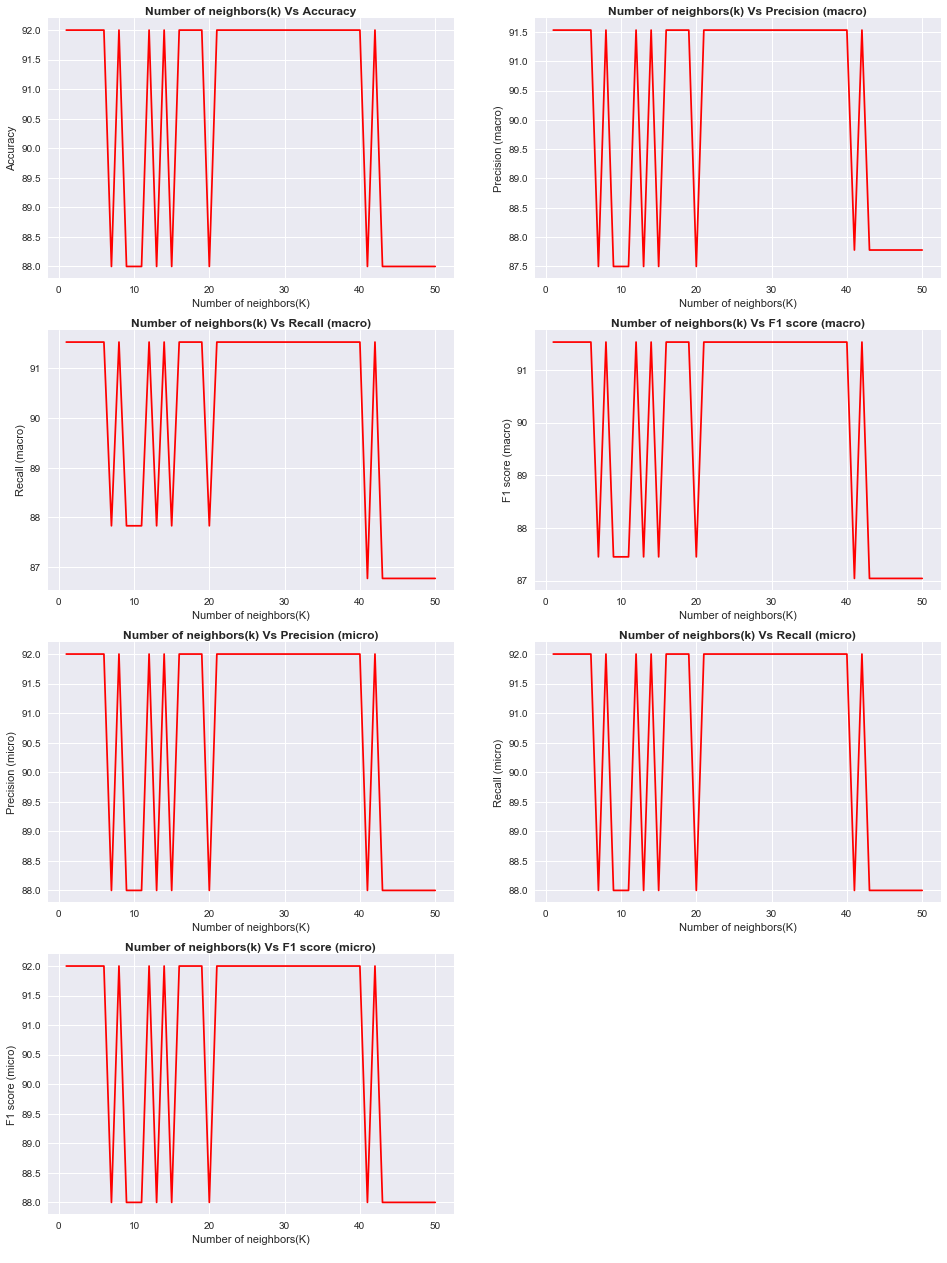

In [17]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_macro, Recall_macro, F1_score_macro, Precision_micro, Recall_micro, F1_score_micro]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (macro)", "Recall (macro)", "F1 score (macro)", 
    "Precision (micro)", "Recall (micro)", "F1 score (micro)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()



# NOTE:-
# As, we can see in the below plots, micro averaged precision, recall & f1 are showing similar plots . 
# However, if we see on macro averaged precision, recall, f1, there is slight difference in all of 
# these plots at many points.

# Plot b/w accuracy, macro averaged precision, recall, F1 vs no. of neighbours || Distance classifier

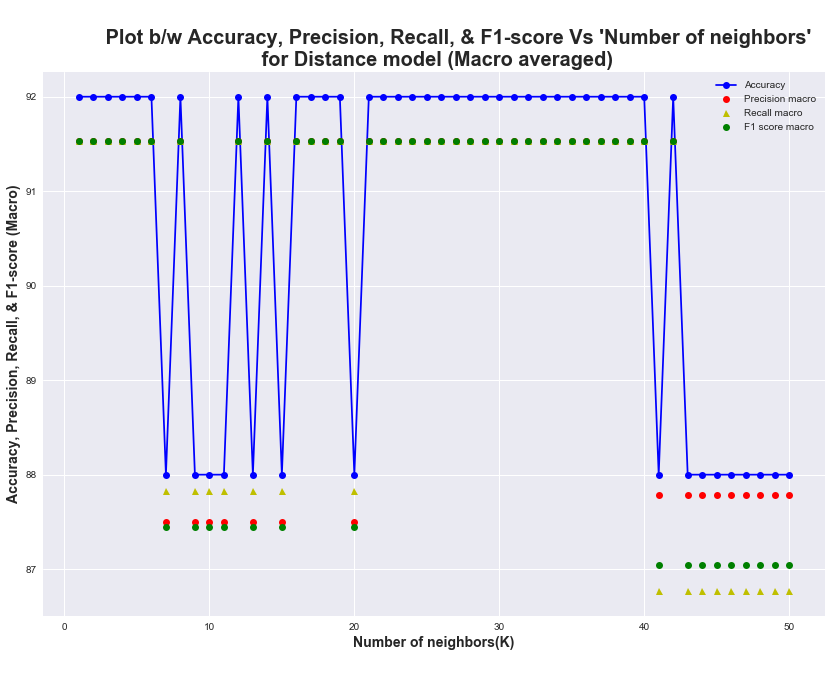

In [18]:
# Inserting a code to create X-axis, K_neighbours.
K_neighbours=list(range(1,51,1))


# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo',  ls='-', label='Accuracy')
plt.plot(K_neighbours, Precision_macro,'ro', label='Precision macro')
plt.plot(K_neighbours, Recall_macro, 'y^', label='Recall macro')
plt.plot(K_neighbours, F1_score_macro, 'go', label='F1 score macro')


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Macro)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Distance model (Macro averaged)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot b/w accuracy, Micro averaged precision, recall, F1 vs no. of neighbours || Distance classifier

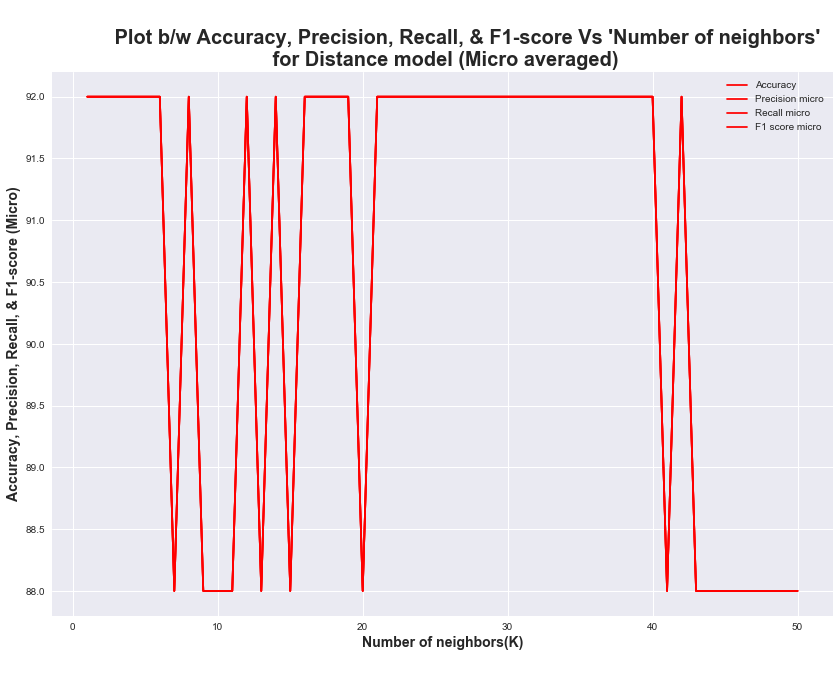

In [19]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))

# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, color="red", label='Accuracy')
plt.plot(K_neighbours, Precision_micro, color="red", label='Precision micro')
plt.plot(K_neighbours, Recall_micro, color="red",  label='Recall micro')
plt.plot(K_neighbours, F1_score_micro, color="red", label='F1 score micro')# linestyle = 'solid'

# Inserting a code to make a plot.
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Micro)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')

# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Distance model (Micro averaged)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# NOTE:-
# We can clearly see in the below graph, precision, recall & f1 are same in case of micro averaged.

# Best & Worst Classifier in Distance model

In [20]:
# Inserting code to create a list to store neighbor values at best & worst accuracy
Best_distance, Worst_distance = [],[] 

#Inserting a code to get all the neighbour values for the best & worst accuracy
for i in range(0,len(Accuracy)):
    if Accuracy[i]==max(Accuracy):
        Best_distance.append(i+1)
    if Accuracy[i]==min(Accuracy):
        Worst_distance.append(i+1)
        
Best_distance_value=max(Accuracy)
Worst_distance_value=min(Accuracy)
        
print("\nBest classifier for Distance model is showing "+ Best_distance_value +" at K="+str(Best_distance))
print("\nWorst classifier for Distance model is showing "+ Worst_distance_value +" at K="+str(Worst_distance)+"\n")


Best classifier for Distance model is showing 92.00 at K=[1, 2, 3, 4, 5, 6, 8, 12, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42]

Worst classifier for Distance model is showing 88.00 at K=[7, 9, 10, 11, 13, 15, 20, 41, 43, 44, 45, 46, 47, 48, 49, 50]



# Question 1 :-  Plot accuracy, precision, recall, and f1-score ("For each class individually") Versus the number of neighbors with a 20% test split on the iris data using all 4 features.  

# Finding Accuracy, precision, recall, F1 for "Uniform" one from k= 1to 50 for each classes i.e. Class 1, Class 2, Class 3 

In [16]:
#Create train_test_result
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)


# Creating a list to store accuracy, micro & macro averaged precision, recall & f1 score for all 'K' values.
accuracy=[]

precision_class1=[]
precision_class2=[]
precision_class3=[]

recall_class1=[]
recall_class2=[]
recall_class3=[]

f1_score_class1=[]
f1_score_class2=[]
f1_score_class3=[]

# Creating a loop to get all accuracy, micro & macro averaged precision, recall & f1 score from k=1 to 50.
for K in range(50):
    
    # Increasing the value of 'k' because neighbour should start from 1 instead of 0.
    K_value = K+1
    
    #Create classifier object
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform')

    #train the classifier(fit the estimator using the training data)
    knn.fit(X_train, y_train)

    #Predict the test data
    class_predict=knn.predict(X_test)


    #Create confusion matrix to calculate the accuracy, precision, recall, f1 score for each class
    Matrix=metrics.confusion_matrix(y_test, class_predict)
        
    
    #accuracy
    accuracy.append((metrics.accuracy_score(y_test, class_predict))*100)
    
    #Precision for class 1 (i.e 0 or 'setosa')
    precision_class1.append((Matrix[0][0]/(Matrix[0][0]+Matrix[1][0]+Matrix[2][0]))*100)

    #Precision for class 2 (i.e 1 or 'versicolor')
    precision_class2.append((Matrix[1][1]/(Matrix[0][1]+Matrix[1][1]+Matrix[2][1]))*100)
    
    #Precision for class 3 (i.e 2 or 'virginica')
    precision_class3.append((Matrix[2][2]/(Matrix[0][2]+Matrix[1][2]+Matrix[2][2]))*100)

    
    #Recall for class 1 (i.e 0 or 'setosa')
    recall_class1.append((Matrix[0][0]/(Matrix[0][0]+Matrix[0][1]+Matrix[0][2]))*100)

    #Recall for class 2 (i.e 1 or 'versicolor')
    recall_class2.append((Matrix[1][1]/(Matrix[1][0]+Matrix[1][1]+Matrix[1][2]))*100)
    
    #Recall for class 3 (i.e 2 or 'virginica')
    recall_class3.append((Matrix[2][2]/(Matrix[2][0]+Matrix[2][1]+Matrix[2][2]))*100)
 

    #F1-score for class 1 (i.e 0 or 'setosa')
    f1_score_class1.append((2*precision_class1[K]*recall_class1[K])/(precision_class1[K]+recall_class1[K]))
    
    #Recall for class 2 (i.e 1 or 'versicolor')
    f1_score_class2.append((2*precision_class2[K]*recall_class2[K])/(precision_class2[K]+recall_class2[K]))
    
    #Recall for class 3 (i.e 2 or 'virginica')
    f1_score_class3.append((2*precision_class3[K]*recall_class3[K])/(precision_class3[K]+recall_class3[K]))

# Rounding off the accuracy up to 2 decimal point 
Accuracy = [ '%.2f' % elem for elem in accuracy]
print('\n\nAccuracy(k = 1 to 50) are :-\n\n',Accuracy)

# Rounding off the precision up to 2 decimal point for class 1, class 2 & class 3
Precision_class1 = [ '%.2f' % elem for elem in precision_class1]
print('\n\nPrecision for Class1(k = 1 to 50) :-\n',Precision_class1)

Precision_class2 = [ '%.2f' % elem for elem in precision_class2]
print('\nPrecision for Class2(k = 1 to 50) :-\n',Precision_class2)

Precision_class3 = [ '%.2f' % elem for elem in precision_class3]
print('\nPrecision for Class3(k = 1 to 50) :-\n\n',Precision_class3)

# Rounding off the recall up to 2 decimal point for class 1, class 2 & class 3
Recall_class1 = [ '%.2f' % elem for elem in recall_class1]
print('\n\nRecall for Class1(k = 1 to 50) :-\n',Recall_class1)

Recall_class2 = [ '%.2f' % elem for elem in recall_class2]
print('\nRecall for Class2(k = 1 to 50) :-\n',Recall_class2)

Recall_class3 = [ '%.2f' % elem for elem in recall_class3]
print('\nRecall for Class3(k = 1 to 50) :-\n\n',Recall_class3)

# Rounding off the f1 score up to 2 decimal point for class 1, class 2 & class 3
F1_score_class1 = [ '%.2f' % elem for elem in f1_score_class1]
print('\n\nF1 score for class1(k = 1 to 50) :-\n',F1_score_class1)

F1_score_class2 = [ '%.2f' % elem for elem in f1_score_class2]
print('\nF1 score for class2(k = 1 to 50) :-\n',F1_score_class2)

F1_score_class3 = [ '%.2f' % elem for elem in f1_score_class3]
print('\nF1 score for class3(k = 1 to 50) :-\n',F1_score_class3)



Accuracy(k = 1 to 50) are :-

 ['96.97', '96.97', '96.97', '96.97', '100.00', '100.00', '96.97', '100.00', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '96.97', '93.94', '93.94', '93.94', '93.94', '93.94', '90.91', '93.94', '96.97', '93.94', '93.94', '93.94', '93.94', '93.94', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '90.91', '84.85']


Precision for Class1(k = 1 to 50) :-
 ['100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '1

# Plot for class 1 || Uniform model

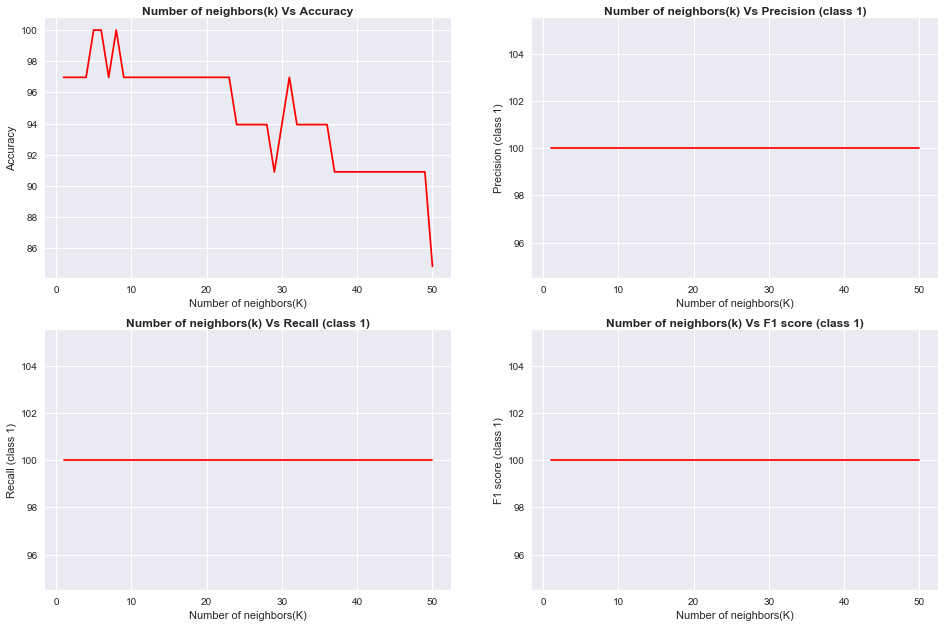

In [17]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class1, Recall_class1, F1_score_class1]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 1)", "Recall (class 1)", "F1 score (class 1)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()

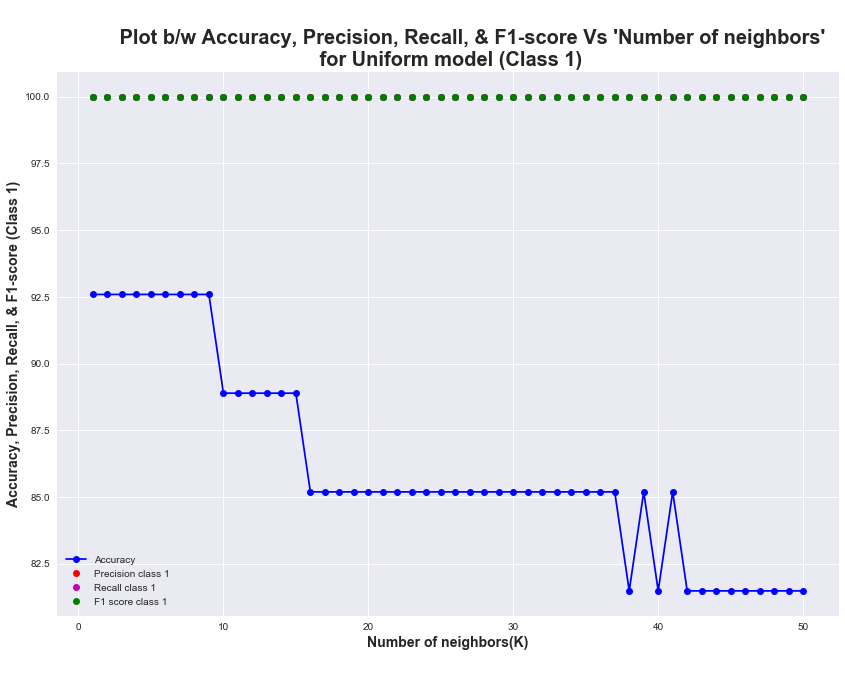

In [24]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', ls='-',label='Accuracy')
plt.plot(K_neighbours, Precision_class1, 'ro', label='Precision class 1')
plt.plot(K_neighbours, Recall_class1,'mo',  label='Recall class 1')
plt.plot(K_neighbours, F1_score_class1,'go', label='F1 score class 1')# linestyle = 'solid'


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 1)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Uniform model (Class 1)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()




# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot for class 2

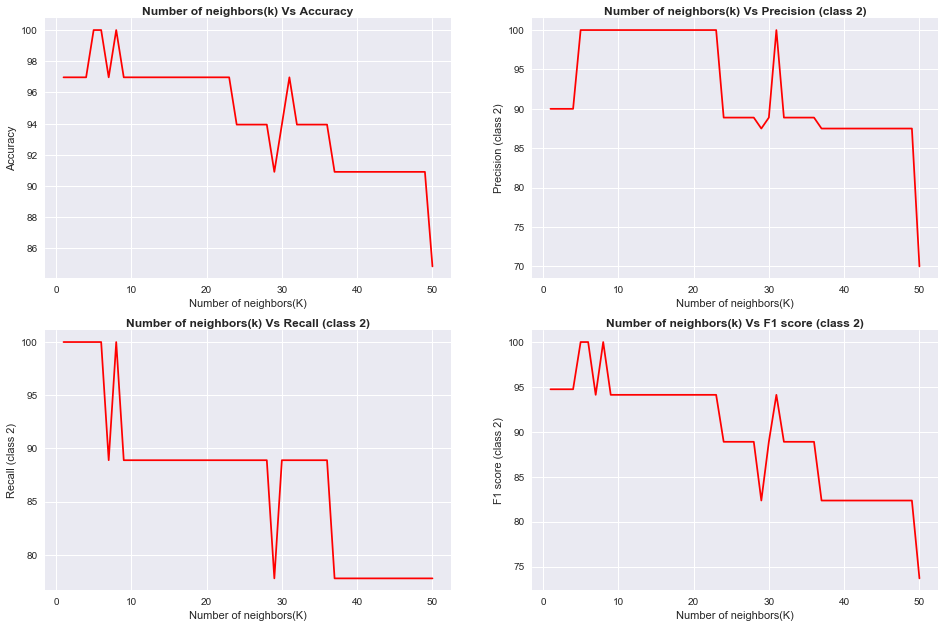

In [19]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class2, Recall_class2, F1_score_class2]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 2)", "Recall (class 2)", "F1 score (class 2)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()

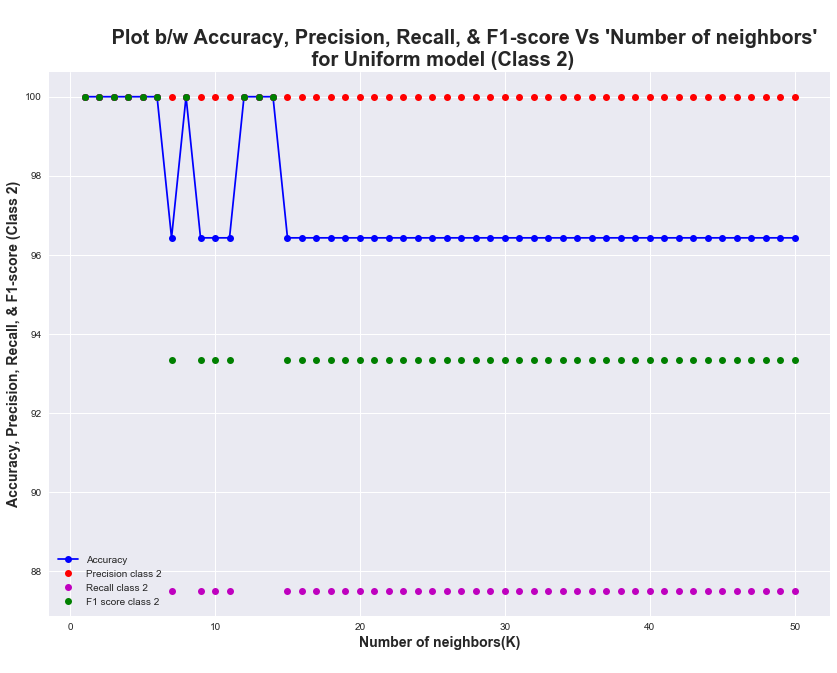

In [96]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo',ls='-', label='Accuracy')
plt.plot(K_neighbours, Precision_class2, 'ro', label='Precision class 2')
plt.plot(K_neighbours, Recall_class2,'mo',  label='Recall class 2')
plt.plot(K_neighbours, F1_score_class2,'go', label='F1 score class 2')# linestyle = 'solid'


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 2)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Uniform model (Class 2)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()




# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot for class 3

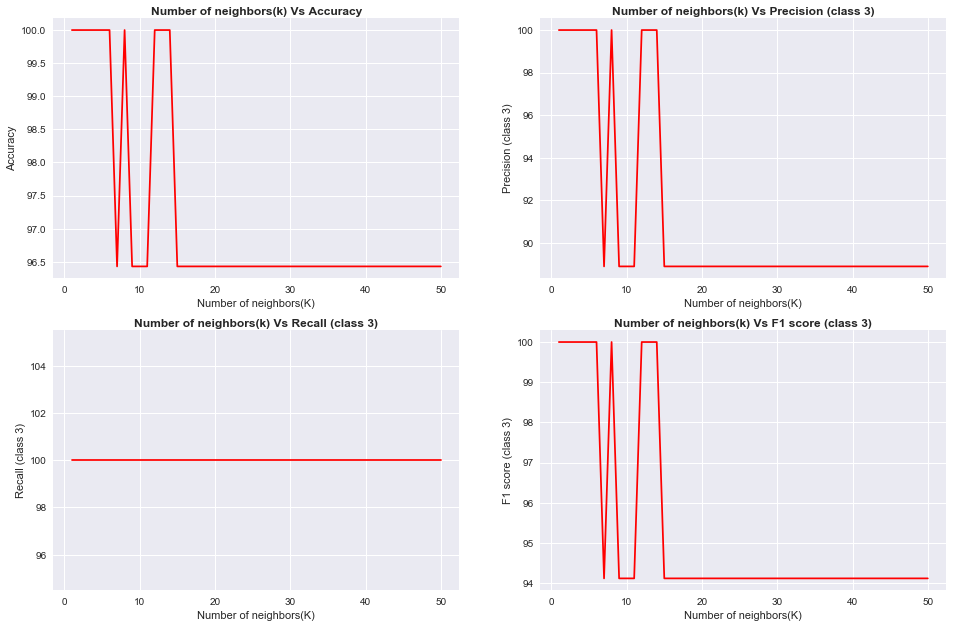

In [97]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class3, Recall_class3, F1_score_class3]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 3)", "Recall (class 3)", "F1 score (class 3)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()

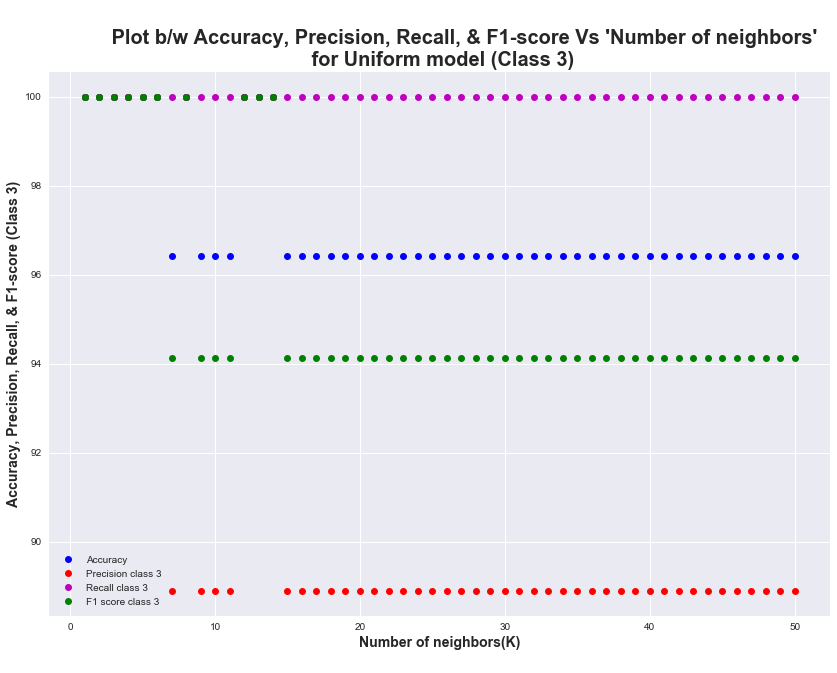

In [98]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', label='Accuracy')
plt.plot(K_neighbours, Precision_class3, 'ro', label='Precision class 3')
plt.plot(K_neighbours, Recall_class3,'mo',  label='Recall class 3')
plt.plot(K_neighbours, F1_score_class3,'go', label='F1 score class 3')


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 3)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Uniform model (Class 3)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()




# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Finding Accuracy, precision, recall, F1 for "Distance" one from k= 1to 50 for each classes i.e. Class 1, Class 2, Class 3

In [105]:
#Create train_test_result
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)


# Creating a list to store accuracy, micro & macro averaged precision, recall & f1 score for all 'K' values.
accuracy=[]

precision_class1=[]
precision_class2=[]
precision_class3=[]

recall_class1=[]
recall_class2=[]
recall_class3=[]

f1_score_class1=[]
f1_score_class2=[]
f1_score_class3=[]


# Creating a loop to get all accuracy, micro & macro averaged precision, recall & f1 score from k=1 to 50.
for K in range(50):
    
    # Increasing the value of 'k' because neighbour should start from 1 instead of 0.
    K_value = K+1  
    
    #Create classifier object
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='distance')

    #train the classifier(fit the estimator using the training data)
    knn.fit(X_train, y_train)

    #Predict the test data
    class_predict=knn.predict(X_test)


    #Create confusion matrix to calculate the accuracy, precision, recall, f1 score for each class
    Matrix=metrics.confusion_matrix(y_test, class_predict)
    
    
    
    #accuracy
    accuracy.append((metrics.accuracy_score(y_test, class_predict))*100)
    
    #Precision for class 1 (i.e 0 or 'setosa')
    precision_class1.append((Matrix[0][0]/(Matrix[0][0]+Matrix[1][0]+Matrix[2][0]))*100)

    #Precision for class 2 (i.e 1 or 'versicolor')
    precision_class2.append((Matrix[1][1]/(Matrix[0][1]+Matrix[1][1]+Matrix[2][1]))*100)
    
    #Precision for class 3 (i.e 2 or 'virginica')
    precision_class3.append((Matrix[2][2]/(Matrix[0][2]+Matrix[1][2]+Matrix[2][2]))*100)

    
    #Recall for class 1 (i.e 0 or 'setosa')
    recall_class1.append((Matrix[0][0]/(Matrix[0][0]+Matrix[0][1]+Matrix[0][2]))*100)

    #Recall for class 2 (i.e 1 or 'versicolor')
    recall_class2.append((Matrix[1][1]/(Matrix[1][0]+Matrix[1][1]+Matrix[1][2]))*100)
    
    #Recall for class 3 (i.e 2 or 'virginica')
    recall_class3.append((Matrix[2][2]/(Matrix[2][0]+Matrix[2][1]+Matrix[2][2]))*100)
 

    #F1-score for class 1 (i.e 0 or 'setosa')
    f1_score_class1.append((2*precision_class1[K]*recall_class1[K])/(precision_class1[K]+recall_class1[K]))
    
    #Recall for class 2 (i.e 1 or 'versicolor')
    f1_score_class2.append((2*precision_class2[K]*recall_class2[K])/(precision_class2[K]+recall_class2[K]))
    
    #Recall for class 3 (i.e 2 or 'virginica')
    f1_score_class3.append((2*precision_class3[K]*recall_class3[K])/(precision_class3[K]+recall_class3[K]))

# Rounding off the accuracy up to 2 decimal point.
Accuracy = [ '%.2f' % elem for elem in accuracy]
print('\n\nAccuracy(k = 1 to 50) are :-\n\n',Accuracy)

# Rounding off the precision up to 2 decimal point for class 1, class 2 & class 3
Precision_class1 = [ '%.2f' % elem for elem in precision_class1]
print('\n\nPrecision for Class1(k = 1 to 50) :-\n',Precision_class1)

Precision_class2 = [ '%.2f' % elem for elem in precision_class2]
print('\nPrecision for Class2(k = 1 to 50) :-\n',Precision_class2)

Precision_class3 = [ '%.2f' % elem for elem in precision_class3]
print('\nPrecision for Class3(k = 1 to 50) :-\n\n',Precision_class3)

# Rounding off the recall up to 2 decimal point for class 1, class 2 & class 3
Recall_class1 = [ '%.2f' % elem for elem in recall_class1]
print('\n\nRecall for Class1(k = 1 to 50) :-\n',Recall_class1)

Recall_class2 = [ '%.2f' % elem for elem in recall_class2]
print('\nRecall for Class2(k = 1 to 50) :-\n',Recall_class2)

Recall_class3 = [ '%.2f' % elem for elem in recall_class3]
print('\nRecall for Class3(k = 1 to 50) :-\n\n',Recall_class3)

# Rounding off the f1 score up to 2 decimal point for class 1, class 2 & class 3
F1_score_class1 = [ '%.2f' % elem for elem in f1_score_class1]
print('\n\nF1 score for class1(k = 1 to 50) :-\n',F1_score_class1)

F1_score_class2 = [ '%.2f' % elem for elem in f1_score_class2]
print('\nF1 score for class2(k = 1 to 50) :-\n',F1_score_class2)

F1_score_class3 = [ '%.2f' % elem for elem in f1_score_class3]
print('\nF1 score for class3(k = 1 to 50) :-\n',F1_score_class3)



Accuracy(k = 1 to 50) are :-

 ['86.21', '86.21', '89.66', '89.66', '93.10', '93.10', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '93.10', '93.10', '93.10', '93.10', '93.10', '96.55', '93.10', '93.10', '93.10', '93.10', '93.10', '96.55', '93.10', '93.10', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55', '96.55']


Precision for Class1(k = 1 to 50) :-
 ['100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.00', '100.

# Plot for class1 || Distance model

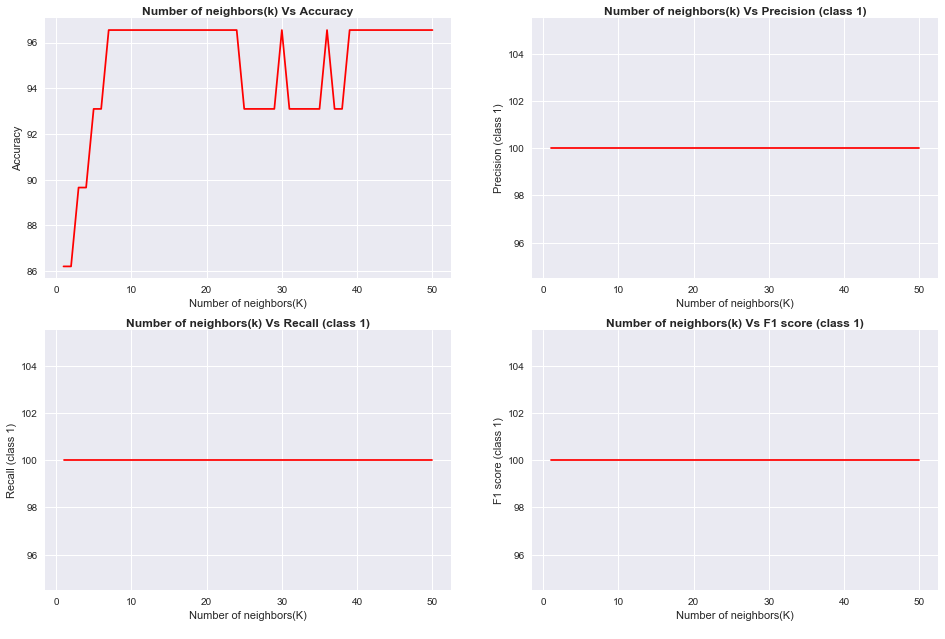

In [112]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class1, Recall_class1, F1_score_class1]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 1)", "Recall (class 1)", "F1 score (class 1)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()



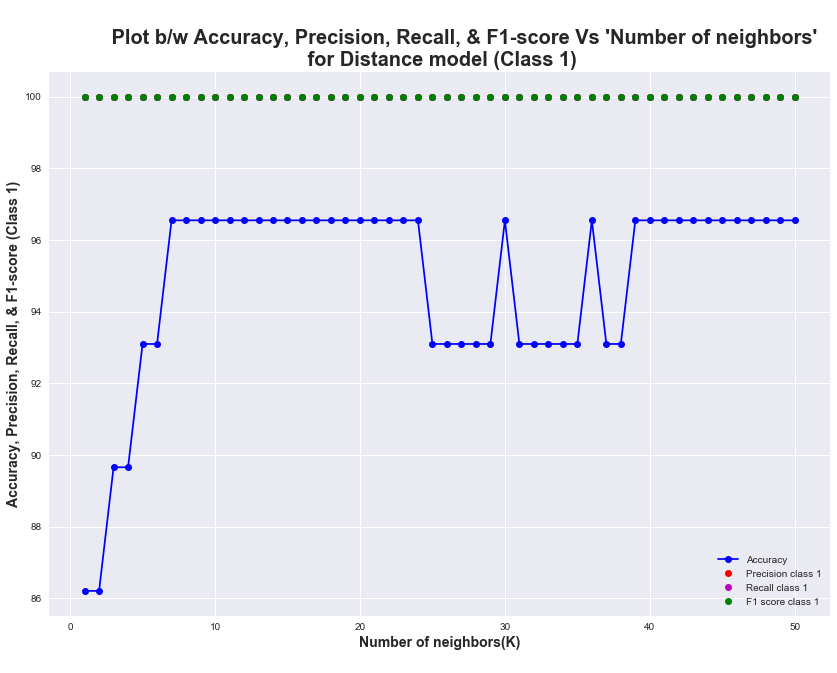

In [113]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', ls='-',label='Accuracy')
plt.plot(K_neighbours, Precision_class1, 'ro', label='Precision class 1')
plt.plot(K_neighbours, Recall_class1,'mo',  label='Recall class 1')
plt.plot(K_neighbours, F1_score_class1,'go', label='F1 score class 1')# linestyle = 'solid'


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 1)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Distance model (Class 1)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot for class2 || Distance model

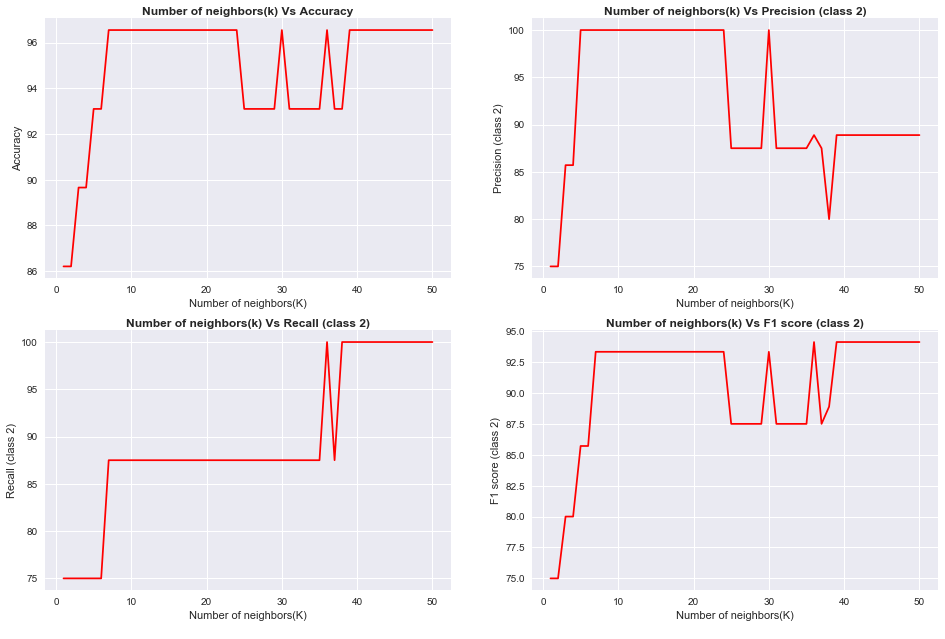

In [114]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class2, Recall_class2, F1_score_class2]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 2)", "Recall (class 2)", "F1 score (class 2)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()


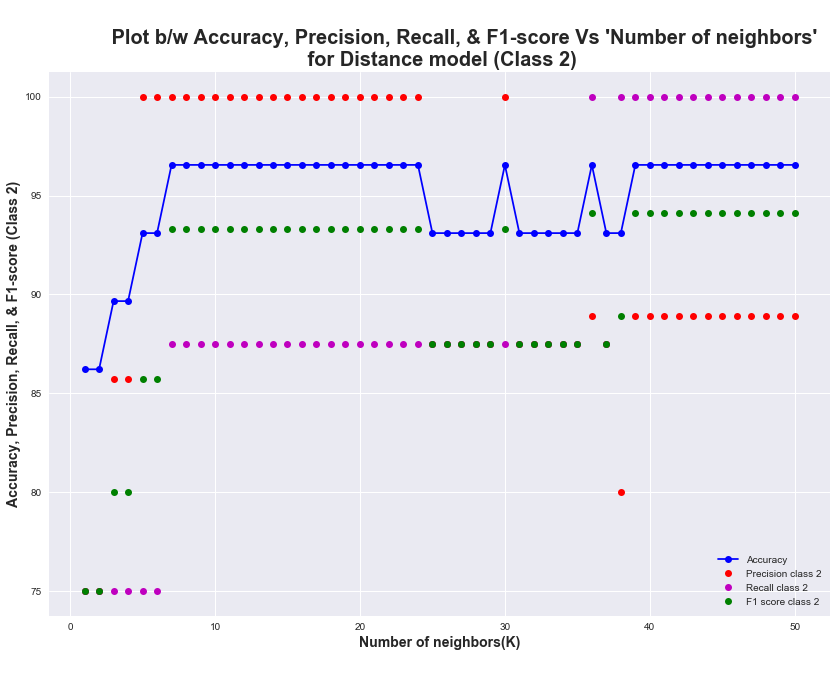

In [115]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', ls='-',label='Accuracy')
plt.plot(K_neighbours, Precision_class2, 'ro', label='Precision class 2')
plt.plot(K_neighbours, Recall_class2,'mo',  label='Recall class 2')
plt.plot(K_neighbours, F1_score_class2,'go', label='F1 score class 2')# linestyle = 'solid'


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 2)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Distance model (Class 2)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Plot for class3 || Distance model

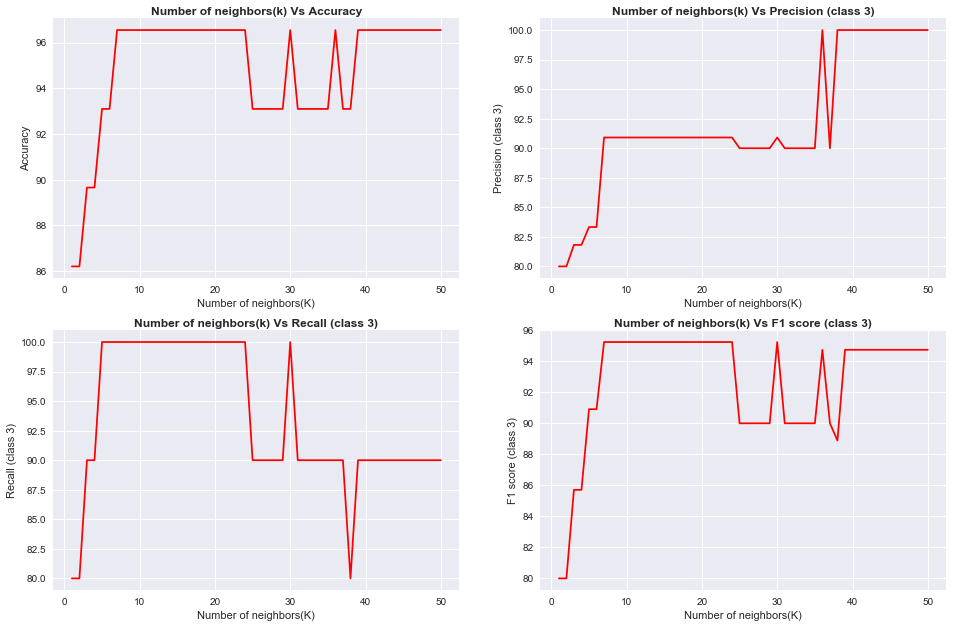

In [116]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(16,22))

# Inserting a code to create a list of y-values.
y=[Accuracy, Precision_class3, Recall_class3, F1_score_class3]

# Inserting code to create a list of y-label.
y1=["Accuracy", "Precision (class 3)", "Recall (class 3)", "F1 score (class 3)"]

# Inserting code to create a for loop to plot all the graphs.
for i in range(0,len(y)):
    
    # Inserting code to set the subplot.
    plt.subplot(4,2,i+1)
    
    # Inserting code to plot the graph.
    plt.plot(K_neighbours, y[i], ls='-', color='red')
    
    # Inserting code to label the x-axis & y-axis.
    plt.ylabel(y1[i], fontsize=11)
    plt.xlabel('Number of neighbors(K)\n', fontsize=11)
    
    # Inserting code to write the title in the plots.
    plt.title("Number of neighbors(k) Vs "+y1[i], y=0.99, fontweight='bold', fontsize=12)
    
plt.show()

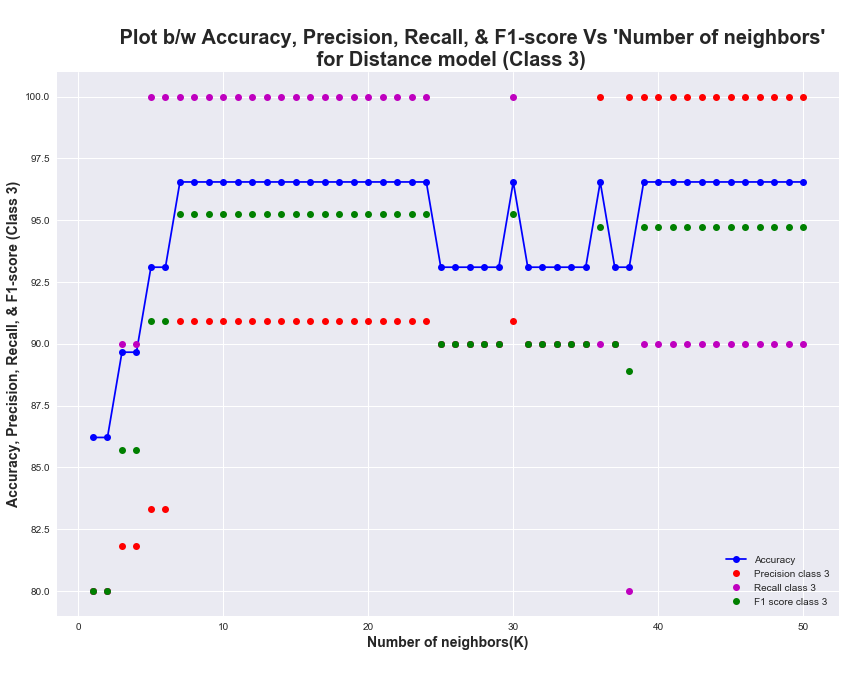

In [117]:
# Inserting a code to increase the size of plot.
plt.figure(figsize=(14,10))


# Inserting a code to make a plot.
plt.plot(K_neighbours, Accuracy, 'bo', ls='-',label='Accuracy')
plt.plot(K_neighbours, Precision_class3, 'ro', label='Precision class 3')
plt.plot(K_neighbours, Recall_class3,'mo',  label='Recall class 3')
plt.plot(K_neighbours, F1_score_class3,'go', label='F1 score class 3')# linestyle = 'solid'


# Inserting a code to label the x-axis & y-axis
plt.ylabel('Accuracy, Precision, Recall, & F1-score (Class 3)', fontsize=14,fontweight='bold')
plt.xlabel('Number of neighbors(K)\n', fontsize=14,fontweight='bold')


# Inserting a code to write the title
plt.title(" \n         Plot b/w Accuracy, Precision, Recall, & F1-score Vs 'Number of neighbors'\n "+
          "for Distance model (Class 3)", fontsize=20,fontweight='bold')

plt.legend(loc='best')
plt.show()


# Note:-
# if for any particular value of 'k', precision or recall is not visible in the beolow graph,
# that means precision & recall is similar to f1 score & showing as a green spot.

# Questions & Final Conclusion
# Which classifier would you choose if you could only choose one? (That is, what value of n_neighbors would you choose and what kind of weight?)

In [22]:
# Inserting a code to get the best & worst classifier.
if max(Best_distance_value,Best_uniform_value)==Best_distance_value:
    k_neighbor1=Best_distance
    classif1="Distance Classifier"
if max(Best_distance_value,Best_uniform_value)==Best_uniform_value:
    k_neighbor1=Best_uniform
    classif1="Uniform Classifier"
if min(Worst_distance_value,Worst_uniform_value)==Worst_distance_value:
    k_neighbor2=Worst_distance
    classif2="Distance Classifier"
if min(Worst_distance_value,Worst_uniform_value)==Worst_uniform_value:
    k_neighbor2=Worst_uniform
    classif2="Uniform Classifier"
    
# Now, we can easily conclude that:-
print("\n\nAs we can clearly see above:-")
print("\nBest accuracy is coming "+ str(max(Best_distance_value,Best_uniform_value)) +" at n_neighbors('k') = "
      + str(k_neighbor1)+ " for "+classif1+ " and,")
print("\nWorst accuracy is coming "+ str(min(Worst_distance_value,Worst_uniform_value)) +" at n_neighbors('k') = "
      + str(k_neighbor2)+" for "+classif2)





As we can clearly see above:-

Best accuracy is coming 97.56 at n_neighbors('k') = [1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 34] for Uniform Classifier and,

Worst accuracy is coming 88.00 at n_neighbors('k') = [7, 9, 10, 11, 13, 15, 20, 41, 43, 44, 45, 46, 47, 48, 49, 50] for Distance Classifier
